## Topic Modelling after Sentiment Analysis
### Using CountVector & NMF (Non-negative Matrix Factorization) Algorithm

In [1]:
#pip install nltk

In [107]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [3]:
raw_dataset = pd.read_csv('mabel.txt', header = None, on_bad_lines='warn', encoding = 'utf8')

C:\Users\priya\AppData\Local\Temp\ipykernel_8068\3521165064.py:1: ParserWarning: Skipping line 23: expected 2 fields, saw 6
Skipping line 44: expected 2 fields, saw 3

  raw_dataset = pd.read_csv('mabel.txt', header = None, on_bad_lines='warn', encoding = 'utf8')


In [4]:
raw_dataset

,0,1
0,05/12/19,1:42 pm - Messages to this chat and calls are...
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?
7,05/12/19,1:43 pm - AR❤: Yes Mam
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...
9,05/12/19,1:43 pm - AR❤: Yeah mam


In [5]:
df = raw_dataset

In [6]:
df.columns = ['Date','Chat']

In [7]:
df

,Date,Chat
0,05/12/19,1:42 pm - Messages to this chat and calls are...
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?
7,05/12/19,1:43 pm - AR❤: Yes Mam
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...
9,05/12/19,1:43 pm - AR❤: Yeah mam


In [8]:
df = df.drop(0)

In [9]:
df

,Date,Chat
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?
7,05/12/19,1:43 pm - AR❤: Yes Mam
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...
9,05/12/19,1:43 pm - AR❤: Yeah mam
10,05/12/19,1:43 pm - Mabel Infoziant: Give me the list t...


### Splitting Message --> Time, Name & Message

In [10]:
Message = df['Chat'].str.split('-',n=1,expand=True)

In [11]:
Message

,0,1
1,1:42 pm,Mabel Infoziant: Hi this is Mabel we just spoke
2,1:42 pm,Mabel Infoziant: What’s your full name
3,1:42 pm,AR❤: Ramisha Rani K
4,1:42 pm,Mabel Infoziant: Ok
5,1:42 pm,Mabel Infoziant: ramisharanik@gmail.com
6,1:43 pm,Mabel Infoziant: Your email Id?
7,1:43 pm,AR❤: Yes Mam
8,1:43 pm,Mabel Infoziant: I will send 2 abstracts for ...
9,1:43 pm,AR❤: Yeah mam
10,1:43 pm,Mabel Infoziant: Give me the list that u have...


In [12]:
Message.columns = ['Time', 'Chat']
Message

,Time,Chat
1,1:42 pm,Mabel Infoziant: Hi this is Mabel we just spoke
2,1:42 pm,Mabel Infoziant: What’s your full name
3,1:42 pm,AR❤: Ramisha Rani K
4,1:42 pm,Mabel Infoziant: Ok
5,1:42 pm,Mabel Infoziant: ramisharanik@gmail.com
6,1:43 pm,Mabel Infoziant: Your email Id?
7,1:43 pm,AR❤: Yes Mam
8,1:43 pm,Mabel Infoziant: I will send 2 abstracts for ...
9,1:43 pm,AR❤: Yeah mam
10,1:43 pm,Mabel Infoziant: Give me the list that u have...


In [13]:
df

,Date,Chat
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?
7,05/12/19,1:43 pm - AR❤: Yes Mam
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...
9,05/12/19,1:43 pm - AR❤: Yeah mam
10,05/12/19,1:43 pm - Mabel Infoziant: Give me the list t...


In [14]:
df['Time'] = Message['Time']

In [15]:
df

,Date,Chat,Time
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...,1:42 pm
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name,1:42 pm
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K,1:42 pm
4,05/12/19,1:42 pm - Mabel Infoziant: Ok,1:42 pm
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...,1:42 pm
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?,1:43 pm
7,05/12/19,1:43 pm - AR❤: Yes Mam,1:43 pm
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...,1:43 pm
9,05/12/19,1:43 pm - AR❤: Yeah mam,1:43 pm
10,05/12/19,1:43 pm - Mabel Infoziant: Give me the list t...,1:43 pm


In [16]:
Message1 = Message['Chat'].str.split(':', n=1, expand=True)

In [17]:
Message1

,0,1
1,Mabel Infoziant,Hi this is Mabel we just spoke
2,Mabel Infoziant,What’s your full name
3,AR❤,Ramisha Rani K
4,Mabel Infoziant,Ok
5,Mabel Infoziant,ramisharanik@gmail.com
6,Mabel Infoziant,Your email Id?
7,AR❤,Yes Mam
8,Mabel Infoziant,I will send 2 abstracts for u to start working
9,AR❤,Yeah mam
10,Mabel Infoziant,Give me the list that u have too


In [18]:
Message1.columns = ['Name','Chat']
Message1

,Name,Chat
1,Mabel Infoziant,Hi this is Mabel we just spoke
2,Mabel Infoziant,What’s your full name
3,AR❤,Ramisha Rani K
4,Mabel Infoziant,Ok
5,Mabel Infoziant,ramisharanik@gmail.com
6,Mabel Infoziant,Your email Id?
7,AR❤,Yes Mam
8,Mabel Infoziant,I will send 2 abstracts for u to start working
9,AR❤,Yeah mam
10,Mabel Infoziant,Give me the list that u have too


In [19]:
df['Name'] = Message1['Name']

In [20]:
df['Message'] = Message1['Chat']

In [21]:
df

,Date,Chat,Time,Name,Message
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
6,05/12/19,1:43 pm - Mabel Infoziant: Your email Id?,1:43 pm,Mabel Infoziant,Your email Id?
7,05/12/19,1:43 pm - AR❤: Yes Mam,1:43 pm,AR❤,Yes Mam
8,05/12/19,1:43 pm - Mabel Infoziant: I will send 2 abst...,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
9,05/12/19,1:43 pm - AR❤: Yeah mam,1:43 pm,AR❤,Yeah mam
10,05/12/19,1:43 pm - Mabel Infoziant: Give me the list t...,1:43 pm,Mabel Infoziant,Give me the list that u have too


In [22]:
dataset = df.drop('Chat',axis=1)

In [23]:
dataset

,Date,Time,Name,Message
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?
7,05/12/19,1:43 pm,AR❤,Yes Mam
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
9,05/12/19,1:43 pm,AR❤,Yeah mam
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too


In [24]:
data = dataset.to_csv('Prepro_whatsapp_data.csv',index=False)

In [25]:
data = pd.read_csv('Prepro_whatsapp_data.csv',index_col=None)
data 

,Date,Time,Name,Message
0,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
1,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
2,05/12/19,1:42 pm,AR❤,Ramisha Rani K
3,05/12/19,1:42 pm,Mabel Infoziant,Ok
4,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
5,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?
6,05/12/19,1:43 pm,AR❤,Yes Mam
7,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
8,05/12/19,1:43 pm,AR❤,Yeah mam
9,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
data.dropna(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     50 non-null     object
 1   Time     50 non-null     object
 2   Name     50 non-null     object
 3   Message  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
# import nltk
# nltk.download('vader_lexicon')

In [30]:
sia = SentimentIntensityAnalyzer()                        # nltk.sentiment.vader.SentimentIntensityAnalyzer.polarity_scores
sentiment = sia.polarity_scores(data['Message'][10])  # Sending a particular text to check the polarity score

In [31]:
sentiment

{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.0772}

In [32]:
sentiment['compound']

0.0772

In [33]:
def SentimentalAnalysis(data, column_name):

    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()   
    
    # Creating the respective columns
    # Forloop for a particular column - Message, apply forloop to all the rows in that column
    data['Scores'] = data[column_name].apply(lambda message : sia.polarity_scores(message))  
    data['Compound'] = data['Scores'].apply(lambda score_dict : score_dict['compound'])
    data['Posivite'] = data['Scores'].apply(lambda score_dict : score_dict['pos'])
    data['Negative'] = data['Scores'].apply(lambda score_dict : score_dict['neg'])
    data['Neutral'] = data['Scores'].apply(lambda score_dict : score_dict['neu'])
    
    data['Feedback'] = data['Compound'].apply(lambda comp: 'Positive Chat' if comp>0 else 'Negative Chat')

    PosNeg = pd.DataFrame(data['Feedback'].value_counts())
    return PosNeg,data

In [34]:
PosNeg,Senti_data = SentimentalAnalysis(data,column_name = 'Message')

In [35]:
Senti_data

,Date,Time,Name,Message,Scores,Compound,Posivite,Negative,Neutral,Feedback
0,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
1,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
2,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
3,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,1.000,0.000,0.000,Positive Chat
4,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
5,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
6,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.730,0.000,0.270,Positive Chat
7,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat
8,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.688,0.000,0.312,Positive Chat
9,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat


In [36]:
PosNeg

,count
Feedback,
Negative Chat,28
Positive Chat,22


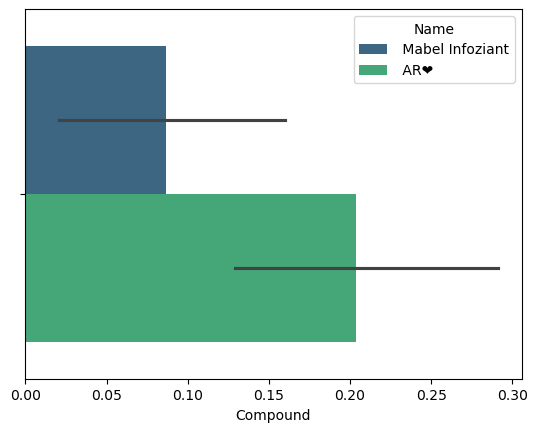

In [122]:
Chart = sb.barplot(x = 'Compound',data = data, hue = 'Name',palette= 'viridis')
plt.show()

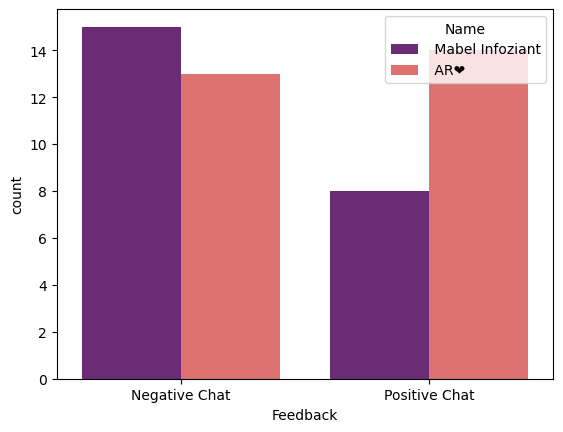

In [125]:
Chart1 = sb.countplot(x = 'Feedback', data=data, hue = 'Name',palette= 'magma')
plt.show()

## Topic Modelling 
### Using CountVector & NMF

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
countV = CountVectorizer(stop_words='english')
mess_vectors = countV.fit_transform(data['Message'])
mess_vectors

<50x122 sparse matrix of type '<class 'numpy.int64'>'
	with 188 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5, random_state=42)
topic_results = nmf_model.fit_transform(mess_vectors)
print(topic_results)

[[9.14806568e-03 0.00000000e+00 1.20829431e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.78769700e-02
  0.00000000e+00]
 [1.49682754e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.19318861e-36]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.41023836e-50
  0.00000000e+00]
 [3.45554128e-01 0.00000000e+00 0.00000000e+00 1.70704932e-02
  0.00000000e+00]
 [0.00000000e+00 3.19701411e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.61439694e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.75699413e-77 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.21731936e+00 9.78169679e-02 5.44626567e-02
  0.00000000e+00]
 [7.30122073e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.64754820e-02 1.485971

In [46]:
for index,topic in enumerate(nmf_model.components_):
    results = [countV.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
print(results)

['sorry', 'auditor', 'hot', 'hold', 'tension', 'financial', 'discussion', 'ma', 'soon', 'meeting']


In [47]:
data['Topic'] = topic_results.argmax(axis=1)

In [48]:
data

,Date,Time,Name,Message,Scores,Compound,Posivite,Negative,Neutral,Feedback,Topic
0,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,2
1,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,0
2,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,3
3,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,1.000,0.000,0.000,Positive Chat,0
4,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,4
5,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,3
6,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.730,0.000,0.270,Positive Chat,0
7,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,1
8,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.688,0.000,0.312,Positive Chat,0
9,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,2


In [49]:
data['Topic'].value_counts()

Topic
0    25
1     9
2     7
3     5
4     4
Name: count, dtype: int64

## Word Cloud

In [52]:
# pip install wordcloud

In [64]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
data

,Date,Time,Name,Message,Scores,Compound,Posivite,Negative,Neutral,Feedback,Topic
0,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,2
1,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,0
2,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,3
3,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,1.000,0.000,0.000,Positive Chat,0
4,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,4
5,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,3
6,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.730,0.000,0.270,Positive Chat,0
7,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,1
8,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.688,0.000,0.312,Positive Chat,0
9,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Negative Chat,2


In [80]:
words = []
english_stopwords = stopwords.words('english')
print('StopWords list :\n\n' , english_stopwords,'\n')

english_stopwords.extend(['omitted', 'voice','missed','call','video','deleted','media','message'])
print('Extented StopWords list  :\n\n', english_stopwords)
                          

StopWords list :

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

In [81]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [83]:
data.shape

(50, 11)

In [86]:
data.shape[0]

50

In [85]:
range(data.shape[0])

range(0, 50)

In [87]:
data.index = range(data.shape[0])

In [88]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [89]:
len(data)

50

In [94]:
data['Message'][35]

' Do the needful'

AttributeError: module 'matplotlib.pyplot' has no attribute 'savfig'

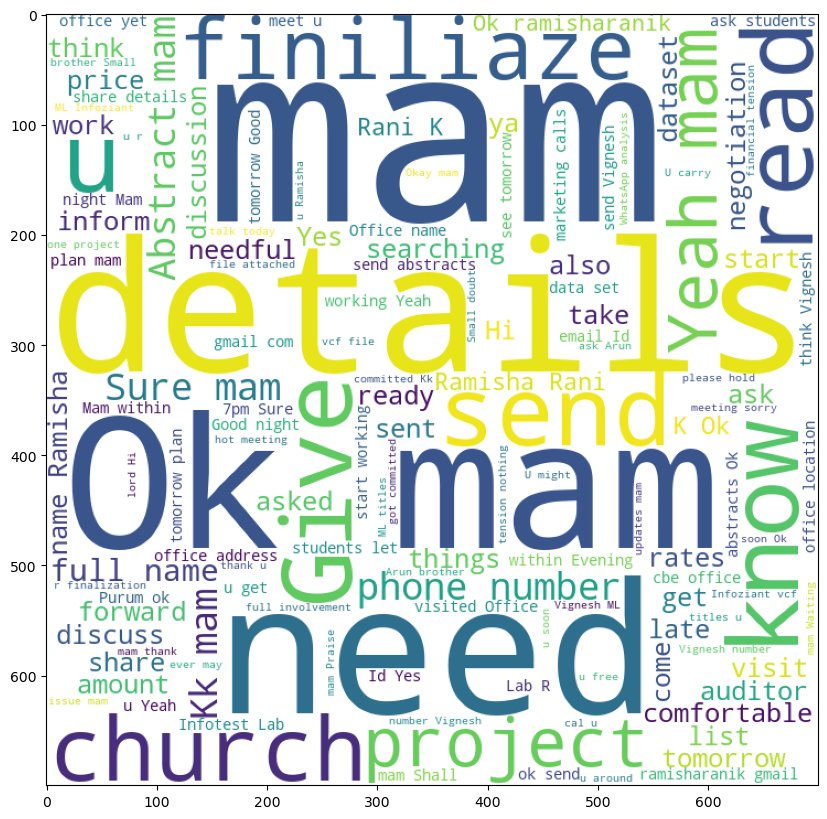

In [131]:
for i in range(1,len(data)):
    words.append(data['Message'][i])
    main_words = ' '.join(words)
    wordcloud = WordCloud(width = 700, 
                          height = 700,
                          background_color = 'White',
                          stopwords = english_stopwords,
                          min_font_size = 10).generate(main_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis = 'off'
plt.tight_layout(pad=0)
plt.savfig('WordCloud.PNG')
plt.show()